<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Hola mundo


In [1]:
!pip install tensorflow==2.0.0-alpha0 

In [2]:
import tensorflow as tf
import keras as ks
import numpy as np

model=ks.Sequential([ks.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs=np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys=np.array([-3, -1, 1, 3, 5, 7], dtype=float)

model.fit(xs, ys, epochs=500)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Epoch 1/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5808
Epoch 2/500
6/6 [==============================] - 0s 213us/step - loss: 0.5684
Epoch 3/500
6/6 [==============================] - 0s 191us/step - loss: 0.5562
Epoch 4/500
6/6 [==============================] - 0s 158us/step - loss: 0.5445
Epoch 5/500
6/6 [==============================] - 0s 161us/step - loss: 0.5330
Epoch 6/500
6/6 [==============================] - 0s 189us/step - loss: 0.5218
Epoch 7/500
6/6 [==============================] - 0s 182us/step - loss: 0.5109
Epoch 8/500
6/6 [==============================] - 0s 170us/step - loss: 0.5003
Epoch 9/500
6/6 [==============================] - 0s 152us/step - loss: 0.4899
Epoch 10/500
6/6 [==============================] - 0s 175us/step - loss: 0.4798
Epoch 11/500
6/6 [==============================] - 0s 173us/step - loss: 0.4699
Epoch 12/500
6/6 [==============================] - 0s 150us/step - loss: 0.4602
Epoch 13/500
6/6 [=====================

In [0]:
model.predict([15])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Tensorflow conjunto de datos fashion mnist

[Fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

In [0]:
fashion_nmist = ks.datasets.fashion_mnist
(train_images, train_labes), (test_images, test_labels) = fashion_nmist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

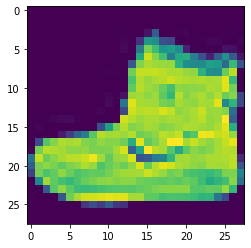

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
print(train_images[0])
print(train_labes[0])


In [0]:
#Normalización
train_images=train_images/255
test_images=test_images/255

In [13]:
model = ks.Sequential([
    ks.layers.Flatten(),
    ks.layers.Dense(128, activation=tf.nn.relu),
    ks.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labes, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.5011
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3767
Epoch 3/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.3379
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.3163
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.2973


In [27]:
model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 32us/step


0.34873048300743104